## Model_7
<p>In this notebook I am exploring the XGBOOST model</p>

In [1]:
# Loading the dataset
import pandas as pd
data = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/train.csv")
data_2 = pd.read_csv("/home/kenbaker-gif/ML-Projects/Boston/data/test.csv")

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from xgboost import XGBRegressor, XGBClassifier

# Example: Regression
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = xgb_model.predict(X_test_scaled)
print(f"MSE:---> {mean_squared_error(y_test, y_pred)}")
print(f"r2Score:---> {r2_score(y_test, y_pred)}")

MSE:---> 6.901238911775484
r2Score:---> 0.9233181896861389


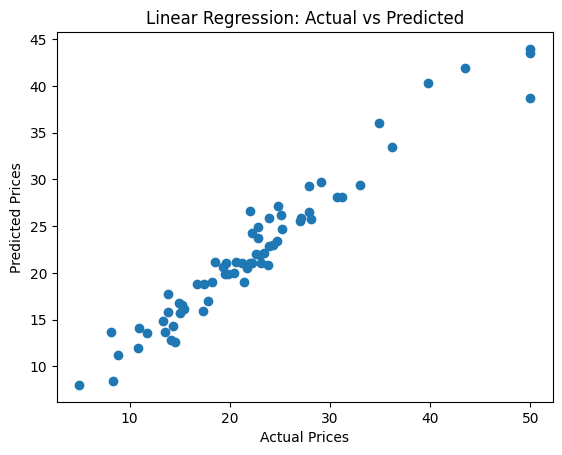

In [8]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()